In [114]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [115]:
avocadoscali = pd.read_csv('../Data/avocados-california-1980-2020.csv')
avocadoscali

,Year,Commodity Code,Crop Name,County Code,County,Harvested Acres,Yield,Production,Price P/U,Unit,Value
0,2020,221999,AVOCADOS ALL,53,Monterey,223,5.56,1240,2379.84,Tons,2951000
1,2020,221999,AVOCADOS ALL,65,Riverside,3020,,,,Tons,88697000
2,2020,221999,AVOCADOS ALL,71,San Bernardino,370,2.16,799,2617.02,Tons,2091000
3,2020,221999,AVOCADOS ALL,73,San Diego,14400,3.51,50500,3028.87,Tons,152958000
4,2020,221999,AVOCADOS ALL,79,San Luis Obispo,4240,5.9,25000,1886.76,Tons,47169000
...,...,...,...,...,...,...,...,...,...,...,...
415,1980,221999,AVOCADOS ALL,73,San Diego,24820,2.00,49640,1300,TONS,64532000
416,1980,221999,AVOCADOS ALL,79,San Luis Obispo,737,0.54,398,1930,TONS,768000
417,1980,221999,AVOCADOS ALL,83,Santa Barbara,5367,5.04,27050,2050,TONS,55452500
418,1980,221999,AVOCADOS ALL,107,Tulare,1421,1.78,2530,580,TONS,1467000


In [116]:
avocadoscali.columns

Index(['Year', ' Commodity Code', ' Crop Name', ' County Code', ' County',
       ' Harvested Acres', ' Yield', ' Production', ' Price P/U', ' Unit',
       ' Value'],
      dtype='object')

In [117]:
avocadoscali.head()

,Year,Commodity Code,Crop Name,County Code,County,Harvested Acres,Yield,Production,Price P/U,Unit,Value
0,2020,221999,AVOCADOS ALL,53,Monterey,223,5.56,1240,2379.84,Tons,2951000
1,2020,221999,AVOCADOS ALL,65,Riverside,3020,,,,Tons,88697000
2,2020,221999,AVOCADOS ALL,71,San Bernardino,370,2.16,799,2617.02,Tons,2091000
3,2020,221999,AVOCADOS ALL,73,San Diego,14400,3.51,50500,3028.87,Tons,152958000
4,2020,221999,AVOCADOS ALL,79,San Luis Obispo,4240,5.9,25000,1886.76,Tons,47169000


In [118]:
#avocadoscali.drop([' Commodity Code'], axis = 1 , inplace = True)

In [119]:
avocadoscali.drop([' Unit'], axis = 1 , inplace = True)

In [120]:
avocadoscali.drop([' Crop Name'], axis = 1 , inplace = True)

In [121]:
avocadoscali.head()

,Year,Commodity Code,County Code,County,Harvested Acres,Yield,Production,Price P/U,Value
0,2020,221999,53,Monterey,223,5.56,1240,2379.84,2951000
1,2020,221999,65,Riverside,3020,,,,88697000
2,2020,221999,71,San Bernardino,370,2.16,799,2617.02,2091000
3,2020,221999,73,San Diego,14400,3.51,50500,3028.87,152958000
4,2020,221999,79,San Luis Obispo,4240,5.9,25000,1886.76,47169000


In [122]:
years_to_keep = [2015, 2016, 2017, 2018, 2019, 2020]
avocadoscali_filtered = avocadoscali[avocadoscali['Year'].isin(years_to_keep)]

In [123]:
avocadoscali_filtered.head()

,Year,Commodity Code,County Code,County,Harvested Acres,Yield,Production,Price P/U,Value
0,2020,221999,53,Monterey,223,5.56,1240,2379.84,2951000
1,2020,221999,65,Riverside,3020,,,,88697000
2,2020,221999,71,San Bernardino,370,2.16,799,2617.02,2091000
3,2020,221999,73,San Diego,14400,3.51,50500,3028.87,152958000
4,2020,221999,79,San Luis Obispo,4240,5.9,25000,1886.76,47169000


In [124]:
avocadoscali_filtered

,Year,Commodity Code,County Code,County,Harvested Acres,Yield,Production,Price P/U,Value
0,2020,221999,53,Monterey,223,5.56,1240,2379.84,2951000
1,2020,221999,65,Riverside,3020,,,,88697000
2,2020,221999,71,San Bernardino,370,2.16,799,2617.02,2091000
3,2020,221999,73,San Diego,14400,3.51,50500,3028.87,152958000
4,2020,221999,79,San Luis Obispo,4240,5.9,25000,1886.76,47169000
5,2020,221999,83,Santa Barbara,5770,4.89,28200,2842.59,80161000
6,2020,221999,111,Ventura,16400,4.29,70300,2556.57,179727000
7,2019,221999,53,Monterey,225,6.58,1480,2500,3700000
8,2019,221999,65,Riverside,2940,5.48,16100,2505.53,40339000
9,2019,221999,71,San Bernardino,397,3.53,1400,2604.29,3646000


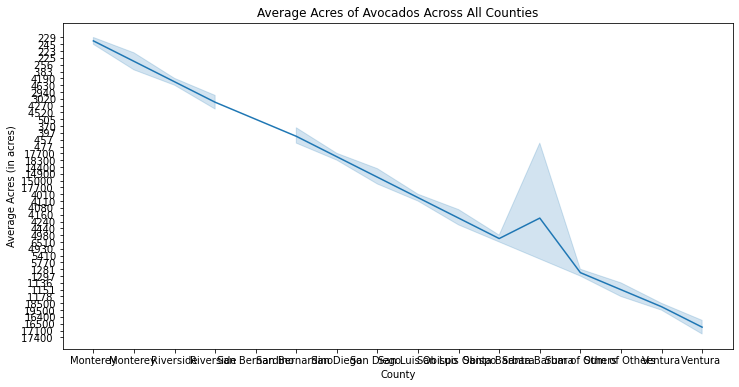

In [125]:
# Group the DataFrame by 'acres' and 'county' and calculate the mean of the 'AverageAcres' column for each group
avg_acres_by_county_year = avocadoscali_filtered.groupby([' County', ' Harvested Acres']).mean()

# Reset the index of the resulting DataFrame
avg_acres_by_county_year = avg_acres_by_county_year.reset_index()

# Set the size of the figure using matplotlib
plt.figure(figsize=(12, 6))

# Create a line plot of the average price of avocados across all regions and years
sns.lineplot(data=avg_acres_by_county_year, x=' County', y=' Harvested Acres')

# Set the title of the plot
plt.title('Average Acres of Avocados Across All Counties')

# Set the labels of the x- and y-axes
plt.xlabel('County')
plt.ylabel('Average Acres (in acres)')

# Show the plot
plt.show()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable sqrt method

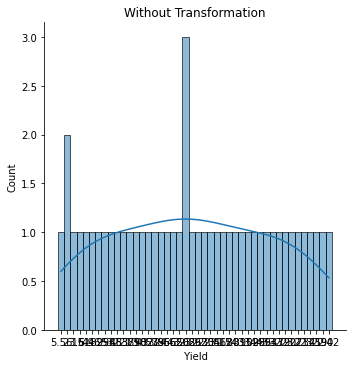

In [126]:
sns.displot(avocadoscali_filtered[' Yield'], kde = True).set(title='Without Transformation')

#With Square Root Transformation
sns.displot(np.sqrt(avocadoscali_filtered[' Yield']), kde = True).set(title='With Square Root Transformation')

#With Log Transformation
sns.displot(np.log(avocadoscali_filtered[' Yield']), kde = True).set(title='With Log Transformation')



# EDA: Looking at the Data

In [127]:
# check the column names 
avocadoscali.columns

Index(['Year', ' Commodity Code', ' County Code', ' County',
       ' Harvested Acres', ' Yield', ' Production', ' Price P/U', ' Value'],
      dtype='object')

In [128]:
#print unique values for Price P/U column
print(avocadoscali[' Price P/U'].unique())

['2379.84' '  ' '2617.02' '3028.87' '1886.76' '2842.59' '2556.57' '2500'
 '2505.53' '2604.29' '3958.08' '3186.48' '3309.44' '2349.02' '2250.00 '
 '2378.27 ' '2379.55 ' '2569.81 ' '2403.39 ' '2338.53 ' '1959.24 '
 '2417.57 ' '3239.83 ' '2258.36 ' '2349.66 ' '3541.74 ' '2852.14 '
 '3676.76 ' '2185.64 ' '3331.14 ' '2430.3' '1919.08' '1360.26' '2348.72'
 '2242.61' '2580.61' '2094.16' '1907.85' '2910.54' '2433.24' '1266.05'
 '2574.69' '1831.64' '2004.32' '3341.91' '2719.43' '2120.00' '1890.00'
 '1608.27' '2606.40' '1975.13' '2270.30' '2644.17' '2403.91' '2114.08'
 '1702.77' '1669.57' '2019.54' '1934.45' '1700.24' '1855.96' '1934.56'
 '1527.85 ' '1692.30 ' '1595.24 ' '1692.41 ' '1438.98 ' '1817.12 '
 '1730.00 ' '2024.00 ' '2363.64' '2403.85' '2619.96' '1586.62' '3192.19'
 '2757.96' '2004.07' '3200.31' '3213.13' '692.88' '1540.88' '1353.51'
 '1582.51' '1804.32' '1584.01' '1820.38' '1628.35' '1738.65' '1748.00 '
 '2198.20 ' '1936.91 ' '1295.00 ' '2850.17 ' '2551.34 ' '2028.29 '
 '2498.26 ' '21

In [129]:
#print unique values for the Harvested Acres column
print(avocadoscali[' Harvested Acres'].unique())

['223' '3020' '370' '14400' '4240' '5770' '16400' '225' '2940' '397'
 '14900' '4440' '5410' '16500' '1151' '256 ' '4270 ' '457 ' '17700 '
 '4160 ' '4930 ' '17100 ' '1136 ' '383 ' '4520 ' '477 ' '15000 ' '4080 '
 '17400 ' '1178 ' '245' '4190' '505' '17700' '4010' '4980' '18500' '1281'
 '229' '4630' '18300' '4110' '6510' '19500' '1297' '5670' '200' '18400'
 '7300' '19700' '1346' '237' '6463' '21100' '4640' '7450' '20100' '1329'
 '226 ' '6310 ' '193 ' '22400 ' '4550 ' '7540 ' '19300 ' '1337 ' '78'
 '226' '6170' '251' '4550' '7540' '16800' '1246' '87' '227' '213' '19100'
 '4320' '7430' '18900' '1300' '80 ' '221 ' '6933 ' '180 ' '24684 ' '3919 '
 '7520 ' '17665 ' '1270 ' '81 ' '7960 ' '190 ' '26549 ' '8148 ' '17608 '
 '1168 ' '53 ' '8190 ' '26064 ' '8328 ' '16050 ' '1506 ' '60 ' '7428 '
 '200 ' '26012 ' '3696 ' '8607 ' '16417 ' '1539 ' '101 ' '175 ' '1872 '
 '210 ' '26326 ' '3675 ' '8541 ' '19206 ' '291 ' '59 ' '134 ' '1761 '
 '7349 ' '213 ' '26122 ' '2934 ' '8485 ' '19234 ' '77 ' '34 ' '13

In [130]:
print(avocadoscali[' Harvested Acres'].describe())

count     420
unique    351
top          
freq       18
Name:  Harvested Acres, dtype: object


In [131]:
print(avocadoscali[' Price P/U'].describe())

count     420
unique    358
top          
freq       26
Name:  Price P/U, dtype: object


In [132]:
print(avocadoscali[' Value'].describe())

count     420
unique    402
top          
freq       18
Name:  Value, dtype: object


In [133]:
avocadoscali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              420 non-null    int64 
 1    Commodity Code   420 non-null    int64 
 2    County Code      420 non-null    int64 
 3    County           420 non-null    object
 4    Harvested Acres  420 non-null    object
 5    Yield            420 non-null    object
 6    Production       420 non-null    object
 7    Price P/U        420 non-null    object
 8    Value            420 non-null    object
dtypes: int64(3), object(6)
memory usage: 29.7+ KB


In [134]:
#What is the average price of avocados across all regions and years.

# Calculate the mean of the '' column
print(average_price = avocadoscali[' Price P/U'].mean())

TypeError: Could not convert 2379.84  2617.023028.871886.762842.592556.5725002505.532604.293958.083186.483309.442349.02  2250.00 2378.27 2379.55 2569.81 2403.39 2338.53 1959.24 2417.57 3239.83 2258.36 2349.66 3541.74 2852.14 3676.76 2185.64 3331.14 2430.31919.081360.262348.722242.612580.612094.161907.852910.542433.241266.052574.691831.642004.323341.912719.432120.001890.001608.272606.401975.132270.302644.172403.912114.081702.771669.572019.541934.451700.241855.961934.561527.85 1692.30 1595.24 1692.41 1438.98 1817.12 1730.00 2024.00 2363.642403.852619.961586.623192.192757.962004.073200.313213.13692.881540.881353.511582.511804.321584.011820.381628.351738.651748.00 2198.20 1936.91 1295.00 2850.17 2551.34 2028.29 2498.26 2130.84 1100.00 1948.57 1781.51 1301.96 2419.44 2028.77 1858.77 2133.80 2283.08 1453.13 2160.34 1760.02 1325.98 1896.95 2043.19 2100.06 2022.59 2047.23 660.00 1505.62 1410.01 1300.00 1133.35 1100.60 1063.82 1097.24 1212.59 1207.92 2326.59 1919.99 2110.02 1280.12 2204.81 1919.83 1836.44 1851.95 1739.47 1450.70 1607.27 1858.94 2042.32 1600.00 1989.00 1726.23 1729.73 1975.78 1386.48 1235.29 2625.00 3621.34 2415.54 1750.82 2298.08 2349.26 2247.98 1459.85 2098.12 84923972121194626882017193618621780163114312137140021522459173219191840154015291508 765 2609 2115 2479 2460 2496 2301 640 2256 2457 760 1827 1923 1389 2652 3099 2551 1380 2547 1095 3193 2230 1923 1189 2005 2141 2019 760 1860   1401 2263 1425 1923 983 1907 2278 2217 816 1677   1362 1299 1819 1769 938 1569 1853 1657 876 1578 1301 961 1792 1692 855 1711 1598 1667 560 1637 1118 1202 1880 1854 823 2114 1875 2113 639 2280   937 681 746 920 794 608 1145 623 517 604   883   995 1200 800 1406 1544 1150 449 1290 1391   1940 1546 815 1726 1611 1625     1571 2439 1255 2040 2280 800 2549 2251 3201 1500 799 2531   2031 691 1732 1260 739 1340 1650 1849 1000 919 1526       1733 937 1600 1120   1101 1000 1611 1571 841   1630 1227     720 429 600 798   163 540 525 398 700   571 543   400   1262   1025 1256   247 820 1045 1193   700   1290 1264 760 800 720 790 615 702 850 857 700 1080 800 451 441 539 533 540 180 370 540 524 300 449 543 520 520 611 624 482 242 540 624 540 700 520 624 732 530 1000 930 698 215 520 930 940 578 721 900 327 482 520 520 414 252 553 520 580 480 520 568 500 1880 1882 1250 528 1300 1930 2050 580 1881  to numeric

# Calculating T-test

In [135]:
#Test for normality of the Price P/U column

In [136]:
print(

SyntaxError: incomplete input (149104261.py, line 1)

In [137]:
alpha = 0.05
stat, p = normaltest(avocadoscali_filtered[' Price P/U'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [138]:
avocadoscali_filtered = pd.avacadoscali_filtered({'2020':[2951000,88697000,2091000,152958000,47169000],'2015':[1464000,25549000,2051000,11045400,16613000]})

AttributeError: module 'pandas' has no attribute 'avacadoscali_filtered'

In [139]:
t_stat, p_value = stats.ttest_ind(avocadoscali_unfiltered['2020'], avocadoscali_unfiltered['2015'])

NameError: name 'avocadoscali_unfiltered' is not defined

In [140]:
california_veg = pd.read_csv('C:/Users/j_eli/Data Science/Final Project/Lesson1/califonia_veg.csv')
california_veg

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2019,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,ARTICHOKES,"ARTICHOKES, ORGANIC - ACRES HARVESTED",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),417,31.9
1,CENSUS,2019,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,ARTICHOKES,"ARTICHOKES, ORGANIC - OPERATIONS WITH AREA HAR...",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),54,18.4
2,CENSUS,2019,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,ARTICHOKES,"ARTICHOKES, ORGANIC - OPERATIONS WITH SALES",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),54,18.4
3,CENSUS,2019,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,ARTICHOKES,"ARTICHOKES, ORGANIC - PRODUCTION, MEASURED IN CWT",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),"67,674",37.6
4,CENSUS,2019,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,ARTICHOKES,"ARTICHOKES, ORGANIC - SALES, MEASURED IN $",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),(D),(D)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,CENSUS,2018,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - OPE...",WATER SOURCE,WATER SOURCE: (ON FARM SURFACE),256,18
466,CENSUS,2018,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - WAT...","IRRIGATION METHOD, PRIMARY","IRRIGATION METHOD, PRIMARY: (GRAVITY)",3.3,9.5
467,CENSUS,2018,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - WAT...","IRRIGATION METHOD, PRIMARY","IRRIGATION METHOD, PRIMARY: (PRESSURE, LOW FLO...",2.5,4.9
468,CENSUS,2018,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - WAT...","IRRIGATION METHOD, PRIMARY","IRRIGATION METHOD, PRIMARY: (PRESSURE, SPRINKLER)",3.3,13


In [141]:
california_veg.columns

Index(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Value',
       'CV (%)'],
      dtype='object')

In [142]:
california_veg.drop(['Week Ending'], axis = 1 , inplace = True)

In [143]:
california_veg.drop(['Ag District'], axis = 1 , inplace = True)

In [144]:
california_veg.drop(['Ag District Code'], axis = 1 , inplace = True)

In [145]:
california_veg.drop(['County ANSI'], axis = 1 , inplace = True)

In [146]:
california_veg.drop(['Region'], axis = 1 , inplace = True)

In [147]:
california_veg.drop(['Zip Code'], axis = 1 , inplace = True)

In [148]:
california_veg.drop(['Watershed'], axis = 1 , inplace = True)

In [149]:
california_veg.head()

,Program,Year,Period,Geo Level,State,State ANSI,County,watershed_code,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2019,YEAR,STATE,CALIFORNIA,6,NaN,0,ARTICHOKES,"ARTICHOKES, ORGANIC - ACRES HARVESTED",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),417,31.9
1,CENSUS,2019,YEAR,STATE,CALIFORNIA,6,NaN,0,ARTICHOKES,"ARTICHOKES, ORGANIC - OPERATIONS WITH AREA HAR...",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),54,18.4
2,CENSUS,2019,YEAR,STATE,CALIFORNIA,6,NaN,0,ARTICHOKES,"ARTICHOKES, ORGANIC - OPERATIONS WITH SALES",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),54,18.4
3,CENSUS,2019,YEAR,STATE,CALIFORNIA,6,NaN,0,ARTICHOKES,"ARTICHOKES, ORGANIC - PRODUCTION, MEASURED IN CWT",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),"67,674",37.6
4,CENSUS,2019,YEAR,STATE,CALIFORNIA,6,NaN,0,ARTICHOKES,"ARTICHOKES, ORGANIC - SALES, MEASURED IN $",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),(D),(D)


In [150]:
california_veg

,Program,Year,Period,Geo Level,State,State ANSI,County,watershed_code,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2019,YEAR,STATE,CALIFORNIA,6,NaN,0,ARTICHOKES,"ARTICHOKES, ORGANIC - ACRES HARVESTED",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),417,31.9
1,CENSUS,2019,YEAR,STATE,CALIFORNIA,6,NaN,0,ARTICHOKES,"ARTICHOKES, ORGANIC - OPERATIONS WITH AREA HAR...",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),54,18.4
2,CENSUS,2019,YEAR,STATE,CALIFORNIA,6,NaN,0,ARTICHOKES,"ARTICHOKES, ORGANIC - OPERATIONS WITH SALES",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),54,18.4
3,CENSUS,2019,YEAR,STATE,CALIFORNIA,6,NaN,0,ARTICHOKES,"ARTICHOKES, ORGANIC - PRODUCTION, MEASURED IN CWT",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),"67,674",37.6
4,CENSUS,2019,YEAR,STATE,CALIFORNIA,6,NaN,0,ARTICHOKES,"ARTICHOKES, ORGANIC - SALES, MEASURED IN $",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),(D),(D)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,CENSUS,2018,YEAR,STATE,CALIFORNIA,6,NaN,0,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - OPE...",WATER SOURCE,WATER SOURCE: (ON FARM SURFACE),256,18
466,CENSUS,2018,YEAR,STATE,CALIFORNIA,6,NaN,0,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - WAT...","IRRIGATION METHOD, PRIMARY","IRRIGATION METHOD, PRIMARY: (GRAVITY)",3.3,9.5
467,CENSUS,2018,YEAR,STATE,CALIFORNIA,6,NaN,0,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - WAT...","IRRIGATION METHOD, PRIMARY","IRRIGATION METHOD, PRIMARY: (PRESSURE, LOW FLO...",2.5,4.9
468,CENSUS,2018,YEAR,STATE,CALIFORNIA,6,NaN,0,VEGETABLE TOTALS,"VEGETABLE TOTALS, IN THE OPEN, IRRIGATED - WAT...","IRRIGATION METHOD, PRIMARY","IRRIGATION METHOD, PRIMARY: (PRESSURE, SPRINKLER)",3.3,13
